# Importing Libraries

In [96]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

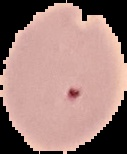

In [225]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog
# Plot the image
def imshow(img, ax=None):
	if ax is None:
		ret, encoded = cv2.imencode(".jpg", img)
		display(Image(encoded))
	else:
		ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
		ax.axis('off')
def select_image():
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select an Image",
                                           filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.tiff")])
    if not file_path:
        raise ValueError("No file selected!")
    return file_path
#Image loading
image_path = select_image()
#img = load_image(image_path)
original_img = cv2.imread(image_path)
#img = cv2.imread("C33P1thinF_IMG_20150619_115740a_cell_162.png")
# Show image
imshow(original_img)


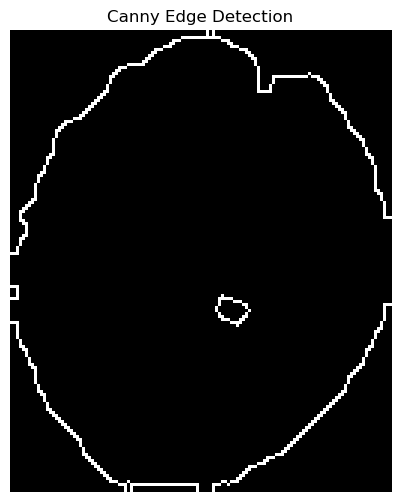

In [226]:
    # Apply Gaussian Blur to smooth the image
    blurred_img = cv2.GaussianBlur(original_img, (5, 5), 1.4)
    
    # Perform Canny edge detection
    edges = cv2.Canny(blurred_img, 100, 200)


    # Display the original and edge-detected images
    display_image(edges, title='Canny Edge Detection')
    kernel = np.ones((5, 5), np.uint8)
    
    # Apply dilation and erosion
    dilated = cv2.dilate(edges, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

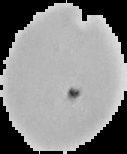

In [227]:
#image grayscale conversion

gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
imshow(gray)


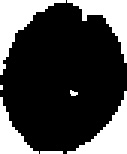

In [228]:
#Threshold Processing
ret, bin_img = cv2.threshold(gray,
							0, 255, 
							cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow(bin_img)

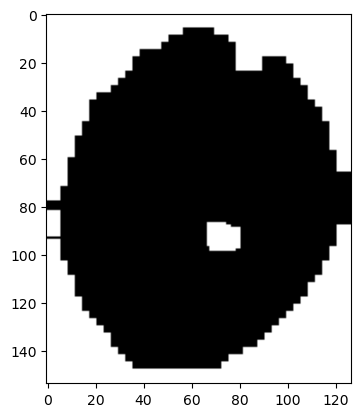

In [229]:
# sure background area
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
sure_bg = cv2.dilate(bin_img, kernel, iterations=3)

plt.imshow(sure_bg, cmap='gray')



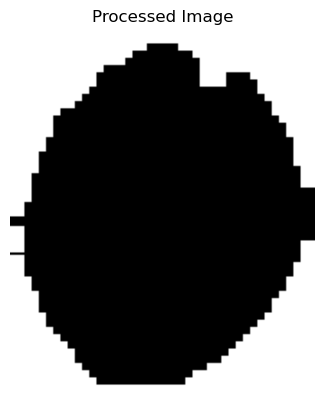

In [230]:
des = cv2.bitwise_not(sure_bg)

# Find contours
contours, hierarchy = cv2.findContours(des, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the inverted image
for cnt in contours:
    cv2.drawContours(des, [cnt], 0, 255, -1)

# Invert the image back to the original state
gray = cv2.bitwise_not(des)

# Save or display the result
plt.imshow(gray, cmap='gray')
plt.title('Processed Image')
plt.axis('off')  # Hide axes
plt.show()



In [231]:
# Read the images
image1 = gray
image2 = sure_bg

# Ensure the images have the same size
if image1.shape != image2.shape:
    raise ValueError("Images must have the same dimensions")

# Subtract the images
diff = cv2.absdiff(image1, image2)

# Compute the sum of absolute differences
sad = np.sum(diff)

print(f'Sum of Absolute Differences: {sad}')


Sum of Absolute Differences: 39270


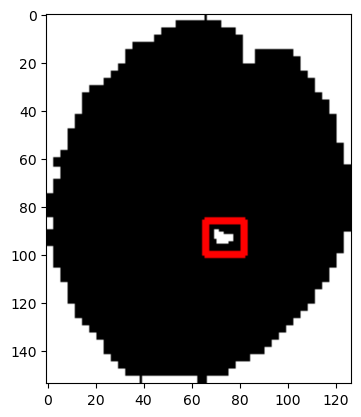

In [232]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image= sure_bg

# Threshold the image to binary
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw rectangles around the detected contours
output_image = cv2.cvtColor(bin_img, cv2.COLOR_GRAY2BGR)
min_contour_area = 50  # Adjust this value to ignore large contours
max_contour_area = 5000  # Adjust this value to ignore too large contours

for contour in contours:
    area = cv2.contourArea(contour)
    if min_contour_area < area < max_contour_area:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Display the image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()


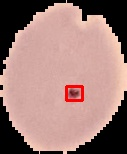

In [233]:

# Convert the original image to grayscale


# Threshold the image to binary
_, binary_image = cv2.threshold(sure_bg, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw rectangles around the detected contours on the original image
min_contour_area = 50  # Adjust this value to ignore large contours
max_contour_area = 5000  # Adjust this value to ignore too large contours

for contour in contours:
    area = cv2.contourArea(contour)
    if min_contour_area < area < max_contour_area:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(original_img, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Show the image with rectangles
imshow(original_img)
